In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [89]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 22})

In [60]:
logs = pd.read_csv('./logs_844usa.csv')
logs['minutes'] = logs['duration'] / 60

In [62]:
congress = pd.read_csv('./congress.csv')

In [65]:
merged = logs.merge(congress, left_on='to', right_on='phone')

In [66]:
num_total = len(merged)
num_busy = len(merged[merged['status'] == 'busy'])
print 'Total calls:', num_total
print 'Total busy:', num_busy
print 'Busy ratio:', float(num_busy) / num_total * 100, '%'
print
print 'Average call duration (s):', merged['duration'].mean()
print 'Median call duration (s):', merged['duration'].median()

nonzero = merged[merged['duration'] > 0]
print 'Average non-zero call duration (s):', nonzero['duration'].mean()
print 'Median non-zero call duration (s):', nonzero['duration'].median()

print 'Longest call (minutes):', nonzero['duration'].max() / 60

Total calls: 15633
Total busy: 949
Busy ratio: 6.07049190814 %

Average call duration (s): 49.4805219727
Median call duration (s): 36.0
Average non-zero call duration (s): 63.3261563651
Median non-zero call duration (s): 49.0
Longest call (minutes): 25


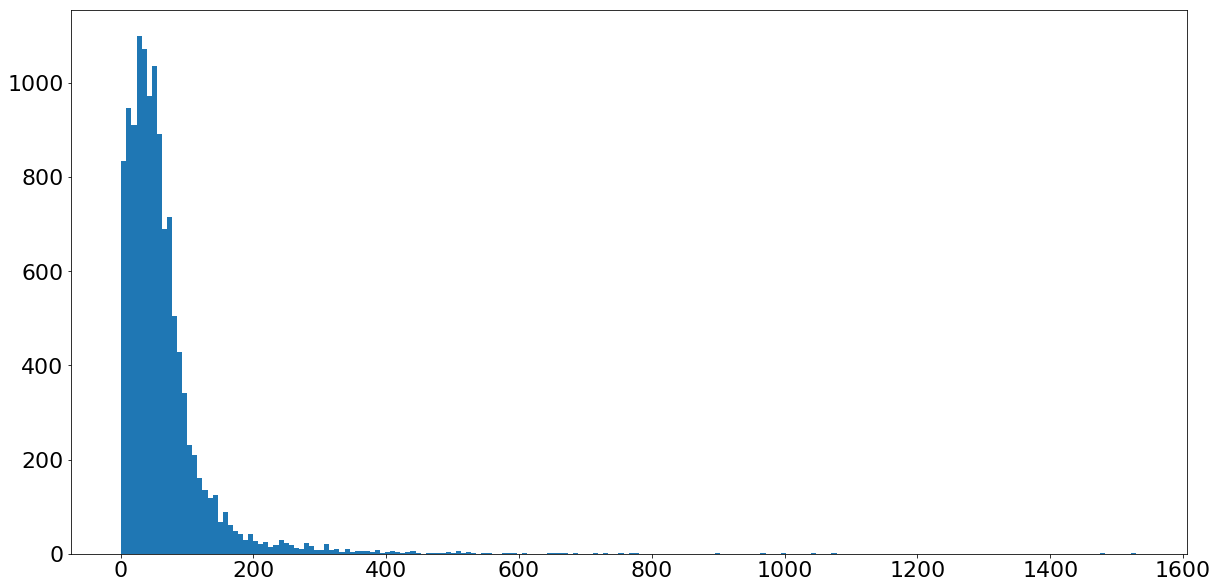

                 from              to     status  duration      direction  \
0      (310) 447-4513  (202) 224-3553  completed        26  outbound-dial   
1      (323) 702-0878  (202) 224-3553  completed        45  outbound-dial   
2      (323) 702-0878  (202) 224-3553  completed        17  outbound-dial   
3      (530) 338-6548  (202) 224-3553  completed        23  outbound-dial   
4      (706) 699-6863  (202) 224-3553  completed        87  outbound-dial   
5      (559) 287-6593  (202) 224-3553  completed        56  outbound-dial   
6      (530) 472-3353  (202) 224-3553  completed        61  outbound-dial   
7      (760) 271-3247  (202) 224-3553  completed        31  outbound-dial   
8      (530) 902-5985  (202) 224-3553   canceled         0  outbound-dial   
9      (530) 902-5985  (202) 224-3553  completed        16  outbound-dial   
10     (760) 481-5636  (202) 224-3553  completed        39  outbound-dial   
11     (323) 637-8947  (202) 224-3553  completed        27  outbound-dial   

In [106]:
# Duration histogram
plt.hist(nonzero['duration'], bins=200)
plt.show()

In [ ]:
# Calls over time
uniques, counts = np.unique(merged['time'], return_counts=True)
plt.bar(np.array(uniques, dtype='datetime64[D]'), counts)
plt.show()

In [ ]:
# Duration by time of day


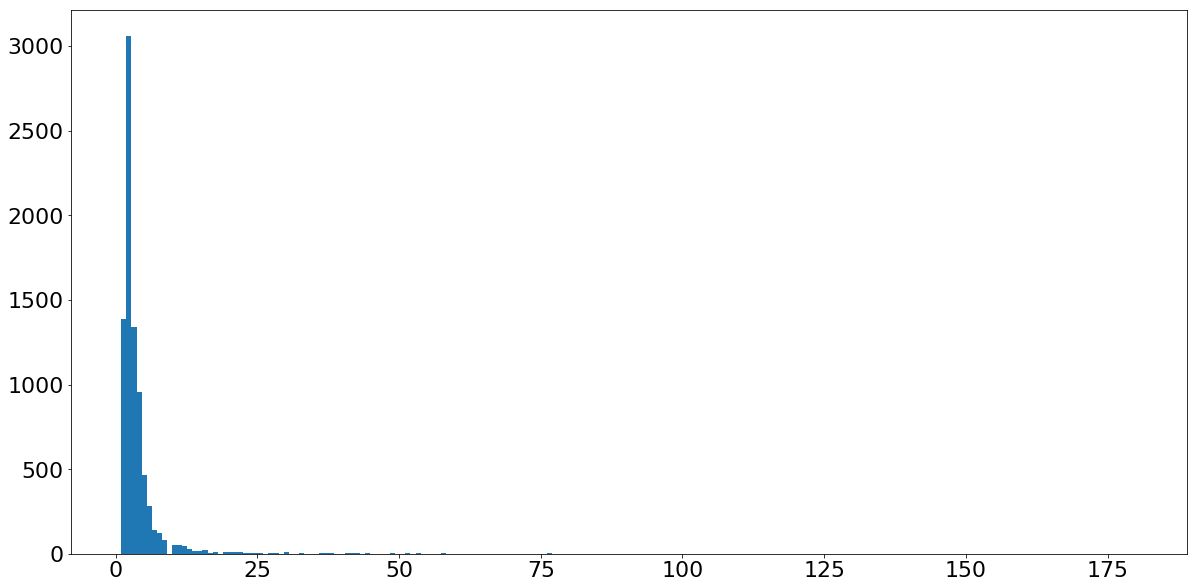

Max: 180
Mean: 3.6243282853
Median: 2.0


In [96]:
# Repeat calls
uniques, counts = np.unique(logs['from'], return_counts=True)
plt.hist(counts, bins=200)
plt.show()

print 'Max:', max(counts)     # caller in PA
print 'Mean:', np.mean(counts)
print 'Median:', np.median(counts)

In [ ]:
merged_group = merged.groupby(['to', 'person__name'])
merged_sum = merged_group.sum()
merged_count = merged_group.agg('count').sort_values(by='status', ascending=False)

In [ ]:
merged_sum.sort_values(by=['minutes'], ascending=False)

In [ ]:
busy = merged[merged['status'] == 'busy']
not_busy = merged[merged['status'] != 'busy']
busy_group = busy.groupby(['to', 'person__name'])

In [ ]:
busiest = busy_group.agg('count').sort_values(by='status', ascending=False)

In [ ]:
busiest.reset_index(inplace=True)

In [ ]:
merged_count.reset_index(inplace=True)

In [ ]:
busy_ratio = merged_count.merge(busiest, left_on='to', right_on='to')

In [ ]:
busy_ratio['busy_ratio'] = busy_ratio['status_y'] / busy_ratio['status_x'] * 100

In [ ]:
final = busy_ratio[['person__name_x', 'to', 'busy_ratio', 'status_x', 'status_y']].sort_values(by=['busy_ratio'], ascending=False)
final.columns = ['Person', 'Phone', 'Busy Ratio %', 'Total #', 'Busy #']

In [ ]:
final

In [ ]:
final[final['Total #'] > 10]

In [ ]:
merged_sum.reset_index().merge(final, left_on='person__name', right_on='Person')